In [5]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [18, 12]

import matplotlib.pyplot as plt
from mne.io import read_raw_edf, concatenate_raws
from mne.datasets import eegbci
from mne import find_events, pick_channels, Epochs, pick_types, compute_covariance
from mne.filter import create_filter
from mne.preprocessing import create_eog_epochs
from mne.viz import plot_cov
import numpy as np

import sys

In [2]:
subject = 1
runs = [6, 10, 14]

raw_fnames = eegbci.load_data(subject, runs)
raw_files = [read_raw_edf(f, preload=True, stim_channel='auto') for f in raw_fnames]
raw = concatenate_raws(raw_files)
raw.rename_channels(lambda x: x.strip('.'))

Extracting EDF parameters from C:\Users\l.iabanzhi\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S001\S001R06.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from C:\Users\l.iabanzhi\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S001\S001R10.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from C:\Users\l.iabanzhi\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S001\S001R14.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to ext

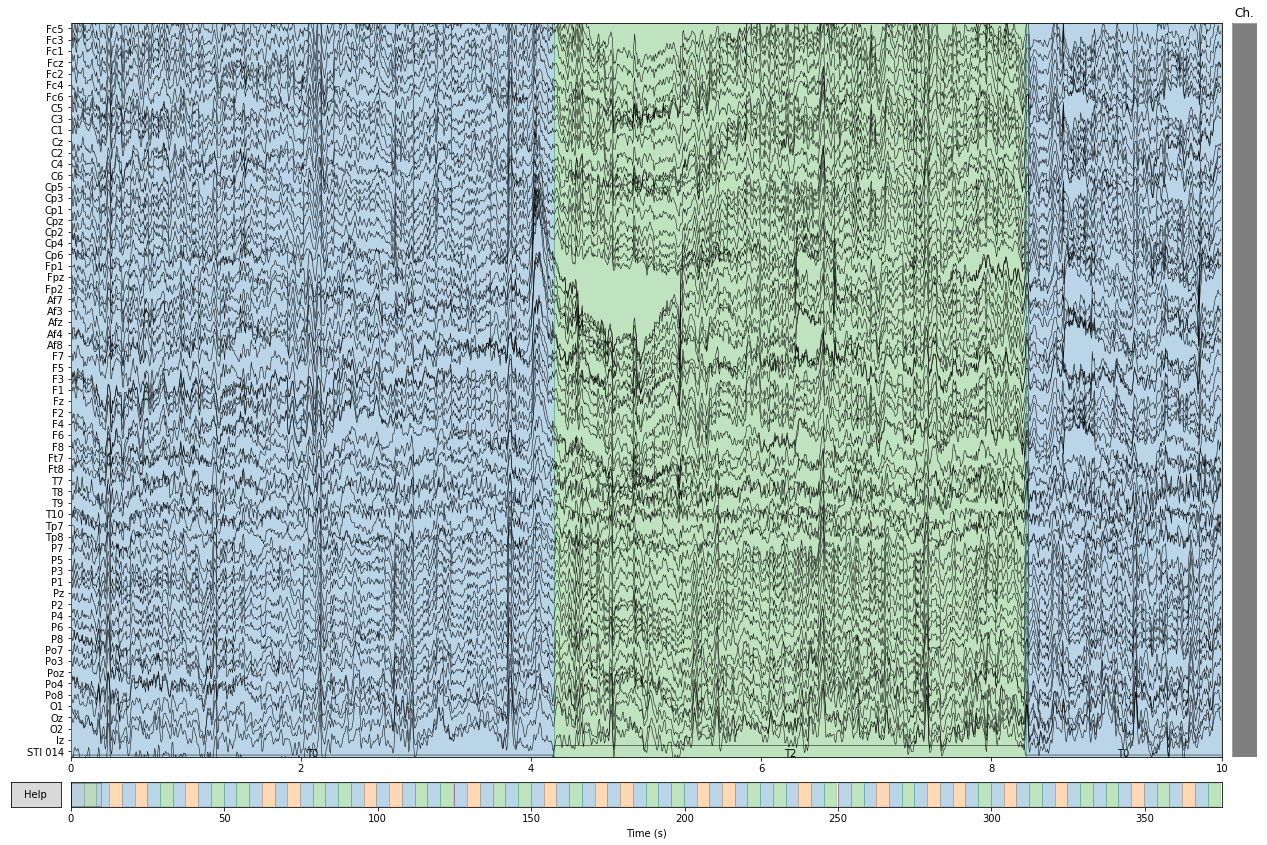

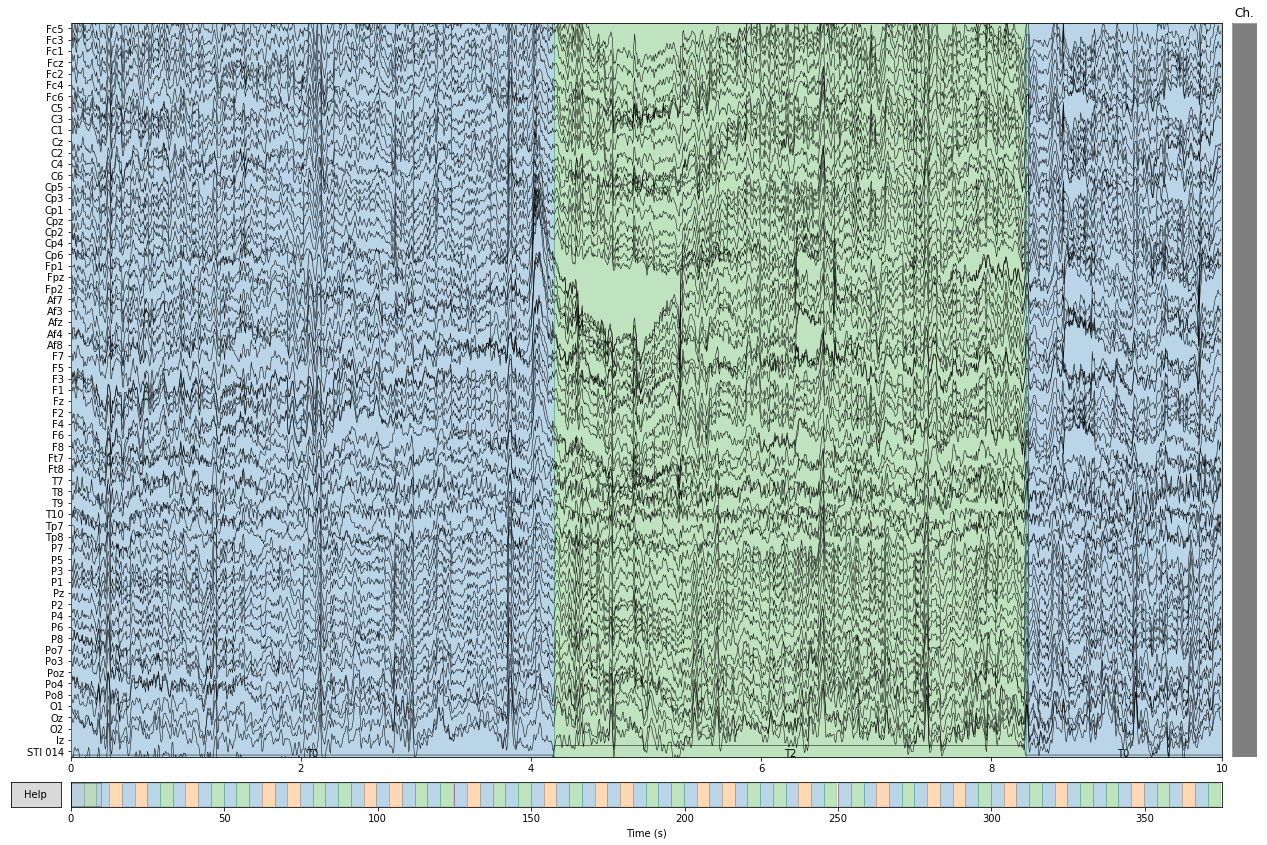

In [6]:
raw.plot(n_channels=65, title='Raw data ploting', show=True, block=True)

Setting up low-pass filter at 40 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 53 samples (0.331 sec) selected
Setting up low-pass filter at 40 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 53 samples (0.331 sec) selected
Setting up low-pass filter at 40 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 53 samples (0.331 sec) selected
Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 529 samples (3.306 sec) selected
Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 529 samples (3.306 sec) selected
Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 529 samples (3.306 sec) selected


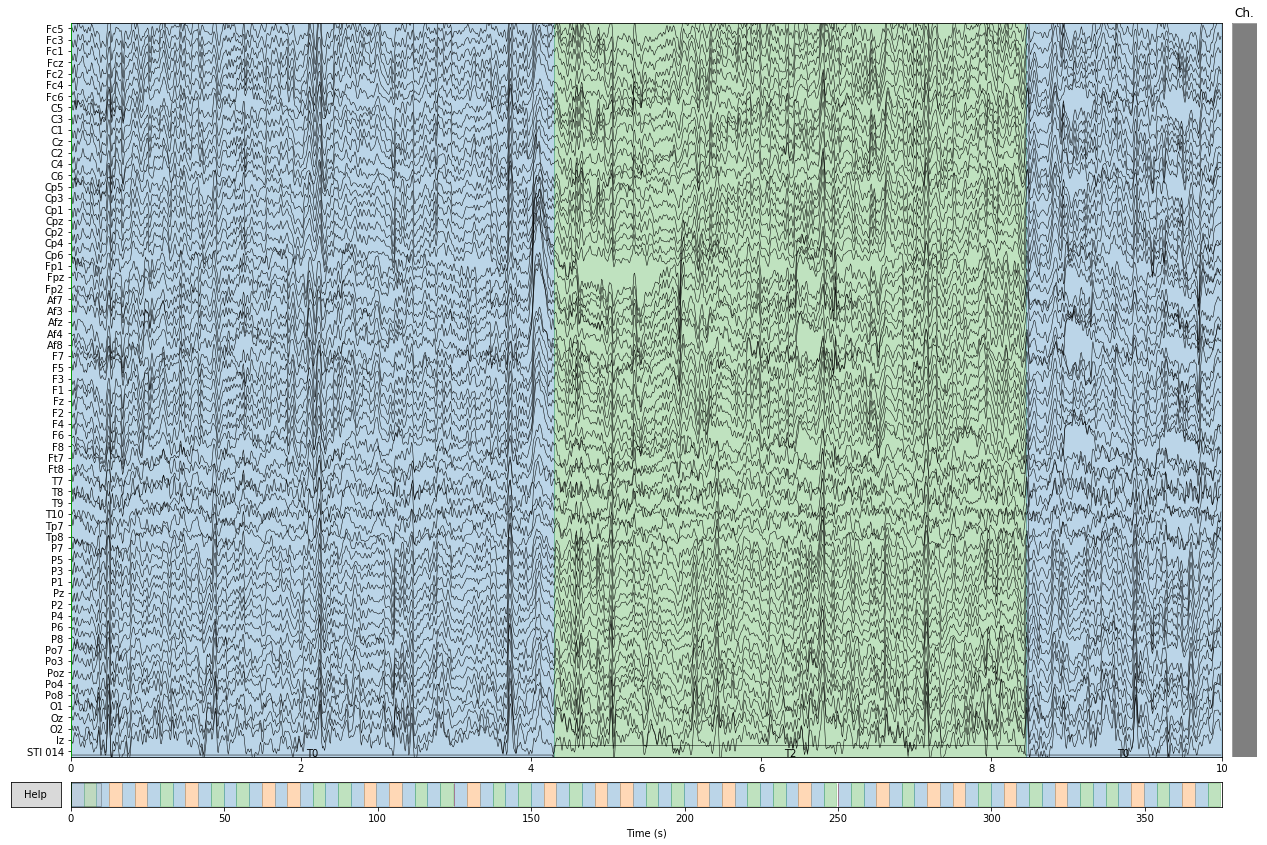

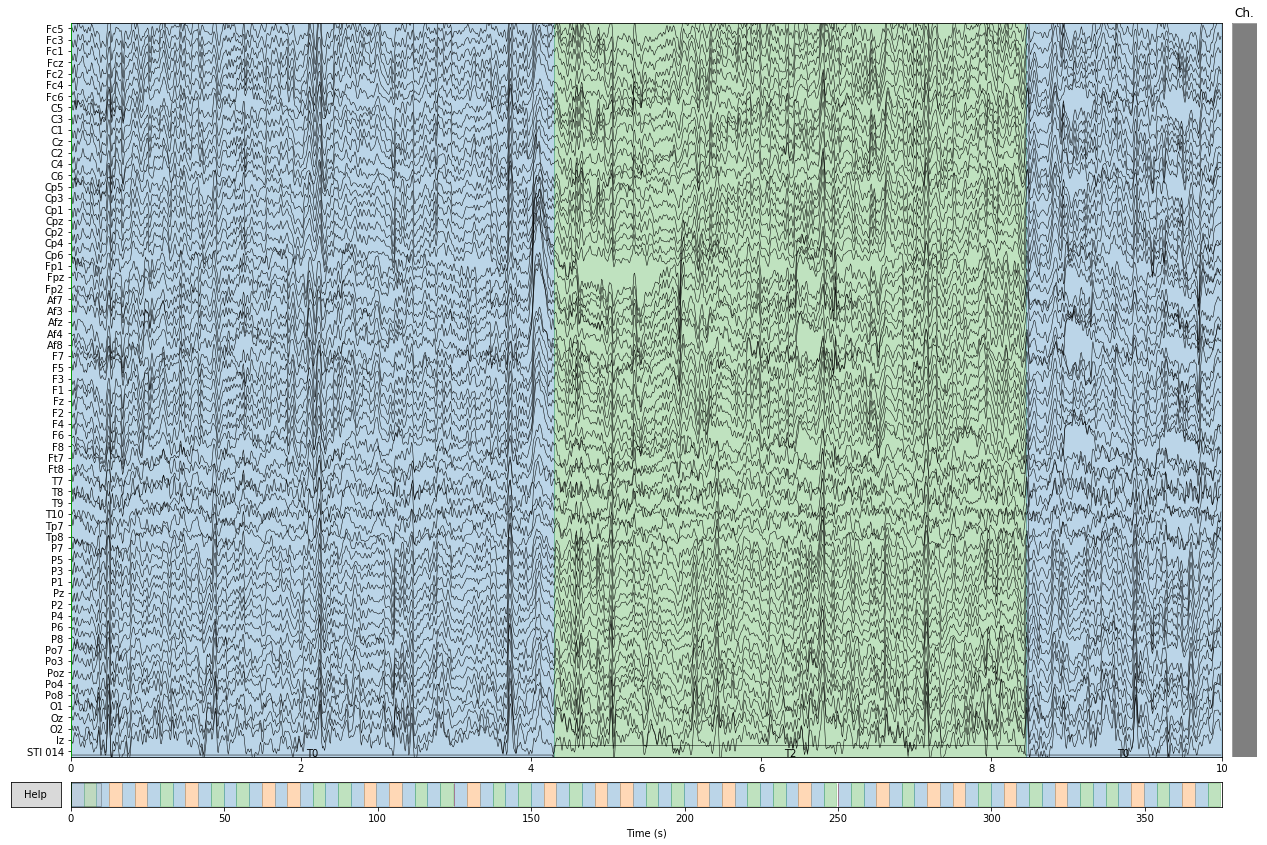

In [7]:
FREQ = 160 # Hz

filtered = raw.filter(None, 40.) # low-pass filter
filtered = raw.filter(1., None) # high-pass filter
filtered.plot(n_channels=65, title='Filtered data ploting', show=True, block=True)

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
71 events found
Event IDs: [1 2 3]
71 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 71 events and 19521 original time points ...
25 bad epochs dropped


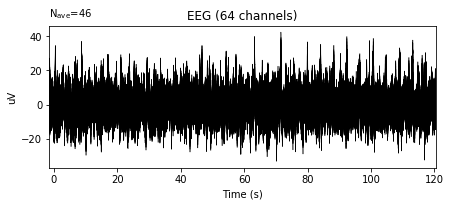

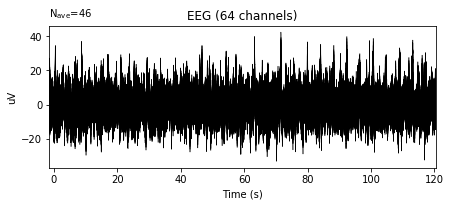

In [25]:
tmin, tmax = -1, 120  # define epochs around events (in s)
event_ids = dict(none=1, hands=2, feet=3)  # map event IDs to tasks
reject = dict(eeg=2e-6) # artefact threshold

picks = pick_channels(raw.info["ch_names"], ["C3", "Cz", "C4"])
events = find_events(filtered, stim_channel='STI 014')
# epochs = Epochs(raw, events, event_ids, tmin, tmax, proj=True, reject=reject, reject_by_annotation=True)
epochs = Epochs(filtered, events, event_id=event_ids, tmin=tmin-0.5, tmax=tmax+0.5, baseline=None, preload=True)
evoked = epochs.average()
evoked.plot()

In [22]:
cov = compute_covariance(epochs, tmax=tmax+0.5)
print(cov)

Estimating covariance using EMPIRICAL
Done.
Number of samples used : 45511
[done]
<Covariance  |  size : 64 x 64, n_samples : 45511, data : [[1.79094564e-09 1.80722619e-09 1.73395012e-09 ... 9.42901914e-10
  8.30091245e-10 8.30562558e-10]
 [1.80722619e-09 1.98085644e-09 1.97375282e-09 ... 1.06359790e-09
  9.55121785e-10 9.00494315e-10]
 [1.73395012e-09 1.97375282e-09 2.08136641e-09 ... 1.05745347e-09
  9.68397415e-10 8.76033716e-10]
 ...
 [9.42901914e-10 1.06359790e-09 1.05745347e-09 ... 1.88344698e-09
  1.76450704e-09 1.63389711e-09]
 [8.30091245e-10 9.55121785e-10 9.68397415e-10 ... 1.76450704e-09
  2.05329238e-09 1.54544780e-09]
 [8.30562558e-10 9.00494315e-10 8.76033716e-10 ... 1.63389711e-09
  1.54544780e-09 1.70825582e-09]]>


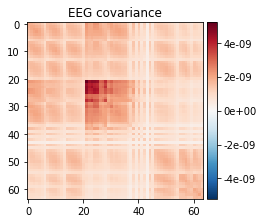

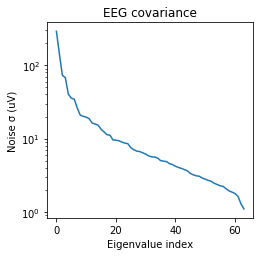

(<Figure size 273.6x266.4 with 2 Axes>, <Figure size 273.6x266.4 with 1 Axes>)

In [23]:
plot_cov(cov, raw.info)

<Epochs  |   71 events (all good), -1.5 - 2.5 sec, baseline off, ~22.7 MB, data loaded,
 'feet': 24
 'hands': 21
 'none': 26>


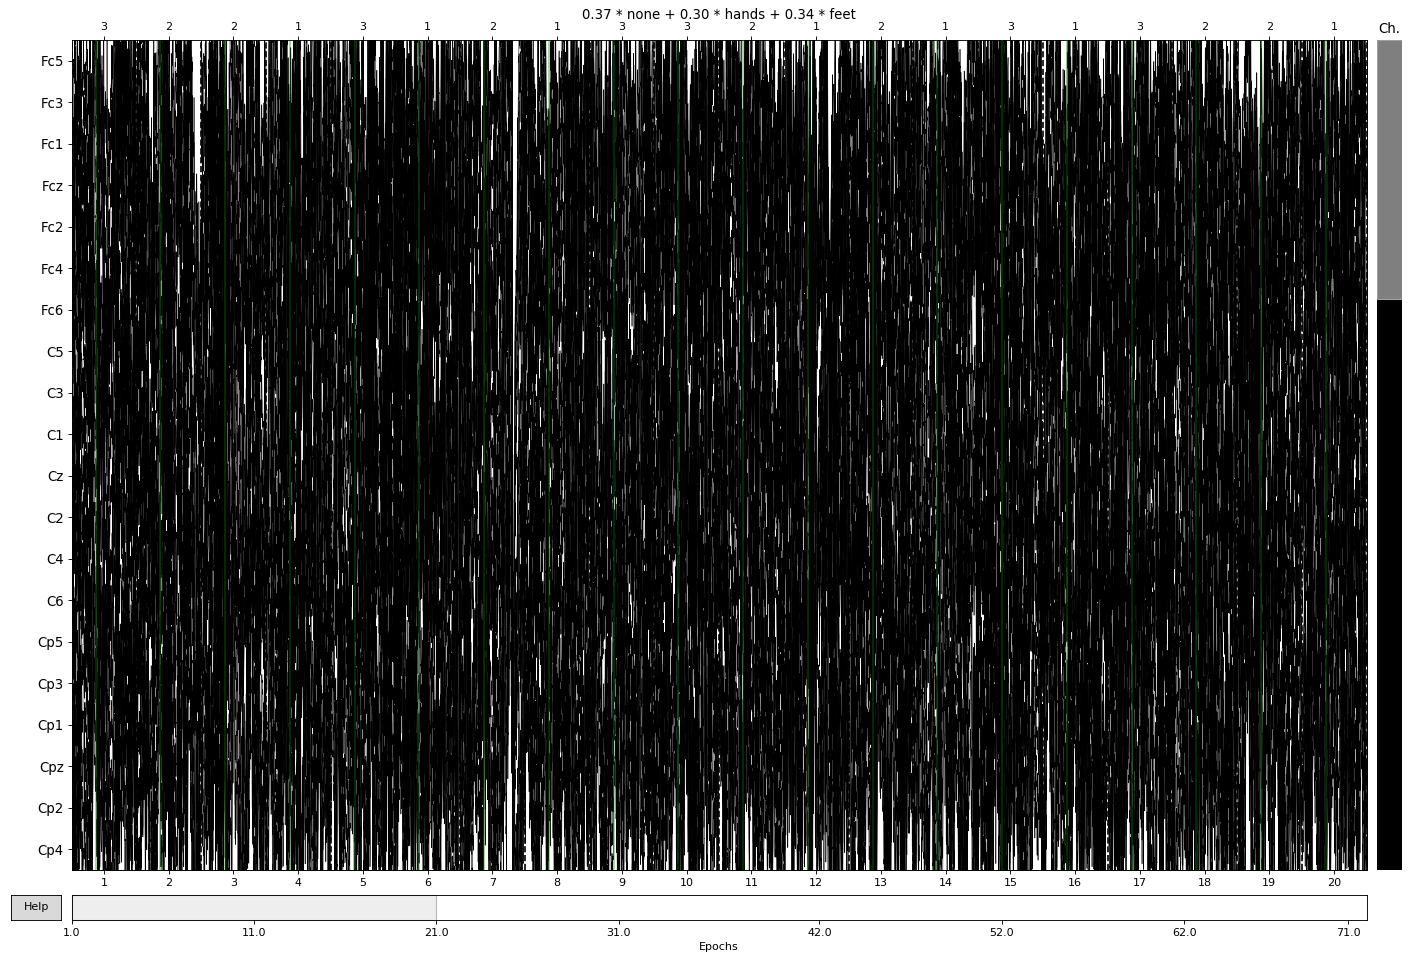

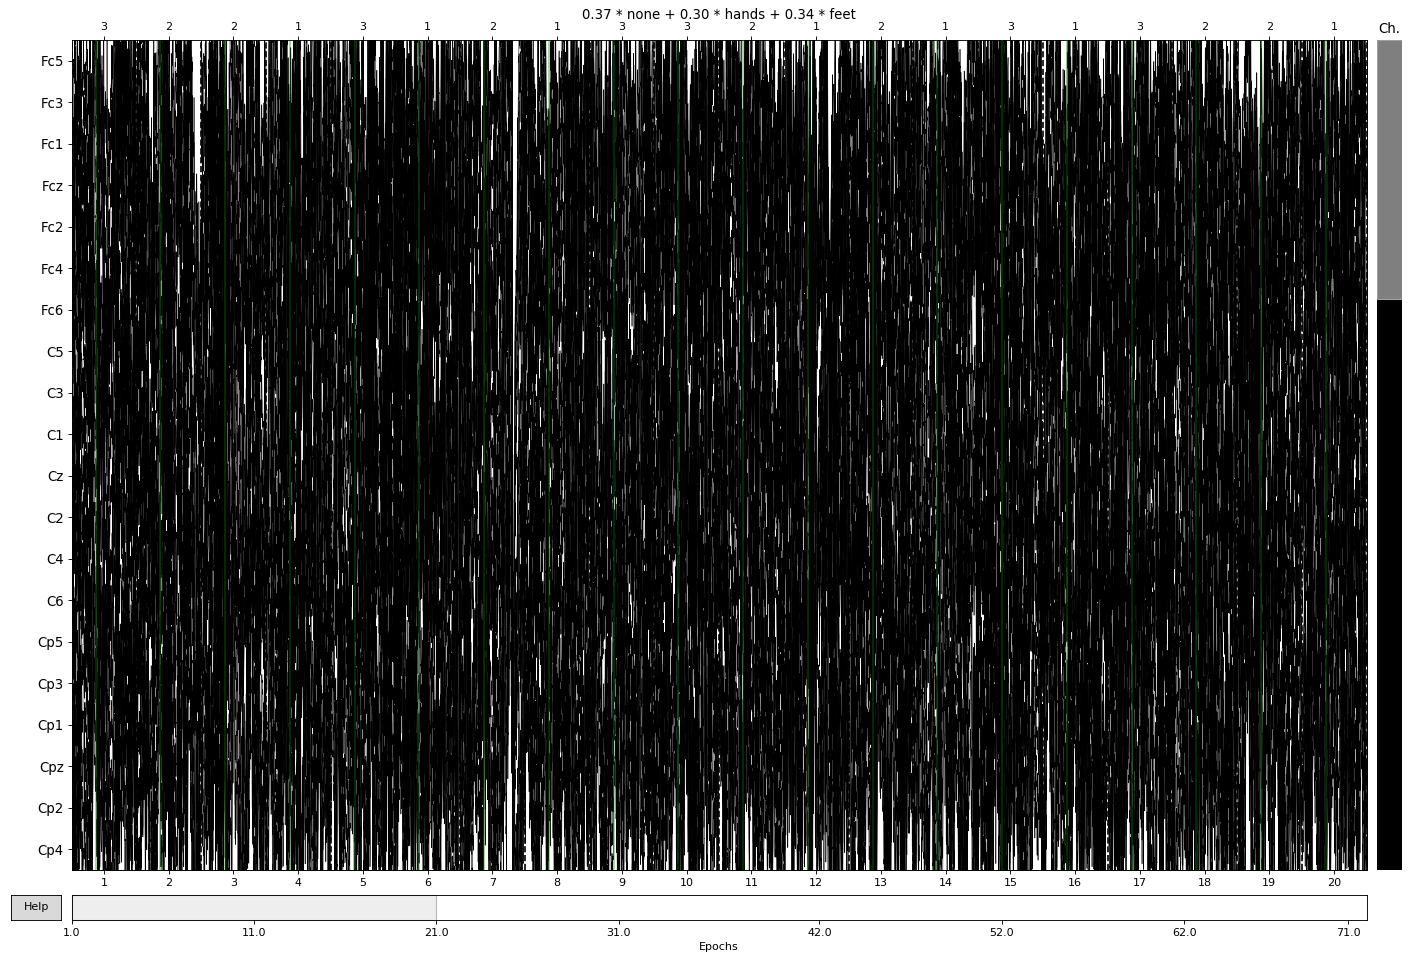

In [24]:
print(epochs)
epochs.plot()